In [1]:
import numpy as np

"""
@INPUT:
    R     : a matrix to be factorized, dimension N x M
    P     : an initial matrix of dimension N x K
    Q     : an initial matrix of dimension M x K
    K     : the number of latent features
    steps : the maximum number of steps to perform the optimisation
    alpha : the learning rate
    lmbda  : the regularization parameter
@OUTPUT:
    the final matrices P and Q
"""


'\n@INPUT:\n    R     : a matrix to be factorized, dimension N x M\n    P     : an initial matrix of dimension N x K\n    Q     : an initial matrix of dimension M x K\n    K     : the number of latent features\n    steps : the maximum number of steps to perform the optimisation\n    alpha : the learning rate\n    lmbda  : the regularization parameter\n@OUTPUT:\n    the final matrices P and Q\n'

Content-based recommendation systems rely solely on information about the user such as gender, age, location and information about movies such as genre, cast, etc. It doesn‘t benefit from users history ratings.

Collaborative filtering by nearest neighbors needs a fixed definition of similarity between users based on their ratings and does not take into account movies features.

In collaborative filtering by matrix factorization method, the algorithm makes use of ratings submitted by users, and automatically learns latent representations for users as well as movies. It is possible to ask questions such as which other users are most similar to this user by defining a distance metric d(Ua, Ub) between user vectors, and similarly for movies. A commonly used distance metric is cosine distance.

In [13]:
def matrix_factorization(R, P, Q, K, steps=1000, alpha=0.0002, lmbda=0.02, threshold=0.001):
    Q = Q.T
    for step in range(steps):
        for i in range(len(R)):
            for j in range(len(R[i])):
                if R[i][j] > 0:
                    eij = R[i][j] - np.dot(P[i,:],Q[:,j])
                    for k in range(K):
                        P[i][k] = P[i][k] + alpha * (2 * eij * Q[k][j] - lmbda * P[i][k])
                        Q[k][j] = Q[k][j] + alpha * (2 * eij * P[i][k] - lmbda * Q[k][j])
        eR = np.dot(P,Q)
        e = 0
        for i in range(len(R)):
            for j in range(len(R[i])):
                if R[i][j] > 0:
                    e = e + pow(R[i][j] - np.dot(P[i,:],Q[:,j]), 2)
                    for k in range(K):
                        e = e + (lmbda/2) * ( pow(P[i][k],2) + pow(Q[k][j],2) )
        if e < threshold:
            break
    return P, Q.T


In [3]:
R = [[5,3,0,1],
     [4,0,0,1],
     [1,1,0,5],
     [1,0,0,4],
     [0,1,5,4],]

R = np.array(R)

N = len(R)
M = len(R[0])
K = 2

P = np.random.rand(N,K)
Q = np.random.rand(M,K)




In [9]:
print(N)
print(M)
print(K)
R.shape

5
4
2


(5, 4)

In [14]:
nP, nQ = matrix_factorization(R, P, Q, K)

ratings = np.dot(nP, nQ.T);

In [15]:
nP # Item matrix

array([[0.74464565, 1.52523644],
       [0.56352825, 1.14015083],
       [1.0857255 , 1.01598819],
       [0.83016909, 0.88007593],
       [1.89131293, 1.07156386]])

In [16]:
nQ #user matrix

array([[0.87384344, 1.83301821],
       [0.32296222, 1.03202562],
       [1.70256199, 1.27611007],
       [1.40731759, 1.33943524]])

In [17]:
ratings

array([[3.44648988, 1.8145755 , 3.21417494, 3.09090835],
       [2.58235269, 1.3586632 , 2.41439972, 2.32022141],
       [2.81107897, 1.39917417, 3.14502773, 2.88881099],
       [2.33863303, 1.17637417, 2.5364881 , 2.34711628],
       [3.61690747, 1.71670399, 4.58751093, 4.09696835]])

In [17]:
R

array([[5, 3, 0, 1],
       [4, 0, 0, 1],
       [1, 1, 0, 5],
       [1, 0, 0, 4],
       [0, 1, 5, 4]])

In [ ]:
#K and lmbda are typically chosen using Cross Validation

In [ ]:
# Further modifications can be Bias Term for each user and each item

In [1]:
# Doing SVD

In [5]:
U, s, V = np.linalg.svd(R, full_matrices=True)

In [11]:
U

array([[ -4.36895927e-01,  -6.69241246e-01,   2.96277508e-01,
         -4.86374751e-01,   1.92086812e-01],
       [ -2.97174983e-01,  -4.43087267e-01,   5.01570817e-02,
          7.95911229e-01,  -2.81727324e-01],
       [ -5.15897282e-01,   1.36315176e-01,  -5.48931928e-01,
         -2.86122028e-01,  -5.76260436e-01],
       [ -3.99996352e-01,   1.10773823e-01,  -4.83493855e-01,
          2.05692708e-01,   7.42735674e-01],
       [ -5.42827680e-01,   5.70032597e-01,   6.12055011e-01,
          7.60894976e-02,  -1.65498540e-16]])

In [12]:
s

array([ 9.03171974,  6.22925557,  3.77397038,  1.83890217])

In [18]:
V

array([[-0.47488998, -0.26234348, -0.3005118 , -0.78444124],
       [-0.78203025, -0.20891356,  0.45754472,  0.36801718],
       [ 0.17212379,  0.25224247,  0.81089006, -0.49920382],
       [ 0.36507752, -0.907692  ,  0.20688838,  0.00329281]])

In [13]:
from matplotlib import pyplot as plt

In [14]:
%matplotlib inline

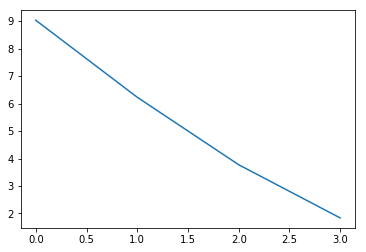

In [15]:
plt.plot(s)
plt.show()

In [20]:
S

array([[ 9.03171974,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  6.22925557,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  3.77397038,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  1.83890217]])

In [21]:
U = U[:,range(4)]

In [22]:
S = np.diag(s)
predRating = np.dot(U, np.dot(S,V))

In [23]:
predRating

array([[  5.00000000e+00,   3.00000000e+00,   2.22044605e-15,
          1.00000000e+00],
       [  4.00000000e+00,  -4.44089210e-16,   9.99200722e-16,
          1.00000000e+00],
       [  1.00000000e+00,   1.00000000e+00,  -1.33226763e-15,
          5.00000000e+00],
       [  1.00000000e+00,   1.88737914e-15,  -9.43689571e-16,
          4.00000000e+00],
       [  3.99680289e-15,   1.00000000e+00,   5.00000000e+00,
          4.00000000e+00]])

In [24]:
# More advanced methods like SVD++ and Non Negative Matrix Transformation